Predicting Car Sales with K-Nearest Neighbors
===

In this project, we will use k-nearest neighbors algorithm and build machine learning models to predict a car's market price. We will use the car's attributes such as; motor's displacement, the weight of the car, the size of the engine, the miles per gallon, horse power, how fast the car accelerates etc.

The data set that we are going to use have information about various cars and their technical aspects that we explained above.

The data set can be found in here: https://archive.ics.uci.edu/ml/datasets/automobile

Introduction
---

In [1]:
import pandas as pd
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It looks like the data set doesn't have a header. We need to specify column names.

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("imports-85.data", names=cols)
pd.options.display.max_columns=100

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

To find predictions, we only need the numeric columns, so we will have a seperate dataframe with only numeric columns.

In [5]:
cars_numeric = cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

In [6]:
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


Data Cleaning
---

The "normalized-losses" column has some "?" values, which we can't use for our predictions. We need to replace these values.

In [7]:
import numpy as np
cars_numeric = cars_numeric.replace("?", np.nan)
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


As we can see, we still have some object data type columns. We need to convert them into float or integer type.

In [9]:
cars_numeric = cars_numeric.astype('float')

In [10]:
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We have 41 null values in "normalized-losses" column, we also have 4 null values in the price column. Thus, we need to do some cleaning.

In [11]:
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Let's replace the null values with the means of their columns.

In [12]:
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [13]:
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

We should normalize the numeric columns, except for the price column, so that all values range from 0 to 1. We don't normalize the price column, because it's our target column.

In [14]:
price_col = cars_numeric["price"]

In [15]:
normalized_cars = (cars_numeric-cars_numeric.min())/(cars_numeric.max()-cars_numeric.min())

In [16]:
normalized_cars["price"] = price_col

In [17]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


Univariate Model
---

We will start with simple univariate k-neatest neighbors model.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [19]:
#function to split the dataset into train and test sets and 
#to do simple validation process

def knn_train_test(train_col, target_col, df):
    model = KNeighborsRegressor()
    
    #randomize the order of the rows
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))
    
    #split the dataframe into halfs for test and train sets
    split_from = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:split_from]
    test_df = rand_df.iloc[split_from:]
    
    #fit a KNN model and make predictions
    model.fit(train_df[[train_col]], train_df[target_col])
    predictions = model.predict(test_df[[train_col]])
    
    #calculate mean squared error and root mean squared error
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = np.sqrt(mse)
    return rmse

Let's test our function and find rmse values for each training column.

In [20]:
rmses = {}
train_cols = normalized_cars.columns.drop("price")

In [21]:
for col in train_cols:
    rmse = knn_train_test(col, "price", normalized_cars)
    rmses[col] = rmse

In [22]:
rmses

{'bore': 6780.627784685976,
 'city-mpg': 4766.422505090134,
 'compression-rate': 6610.812153159129,
 'curb-weight': 4401.118254793124,
 'engine-size': 3238.4628296477176,
 'height': 8144.441042663747,
 'highway-mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'normalized-losses': 7330.197653434445,
 'peak-rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel-base': 5461.553997873057,
 'width': 4704.482589704386}

It looks like engine-size column performed the best, since it has the lowest rmse value.

The function that we previously wrote only accepted the default value of k which is 5. Next, we will update the function so that it will accept k values of (1, 3, 5, 7, and 9).

In [23]:
def knn_train_test_upd(train_col, target_col, df):
    #randomize the order of the rows
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))

    #split the dataframe into halfs for test and train sets
    split_from = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:split_from]
    test_df = rand_df.iloc[split_from:]
    
    k_values = [1,3,5,7,9]
    rmse_values = {}
    
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[[train_col]], train_df[target_col])
        predictions = model.predict(test_df[[train_col]])

        #calculate mean squared error and root mean squared error
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = np.sqrt(mse)
        rmse_values[k] = rmse
    return rmse_values

In [24]:
rmse_results = {}

for col in train_cols:
    rmse = knn_train_test_upd(col, "price", normalized_cars)
    rmse_results[col] = rmse

rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

Let's visualize our findings with a line plot.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

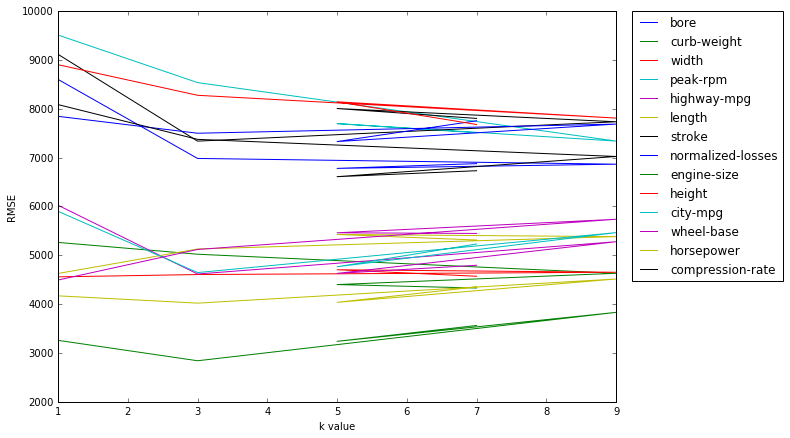

In [66]:
plt.figure(figsize=(10,7))

for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k)
    plt.xlabel("k value")
    plt.ylabel("RMSE")
    plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)

Multivariate Model
---

In the previous step we worked with one column at a time. Next, we will modify our function to work with multiple columns.

In [27]:
#find best features according to the mean of rmse results for different k values

avg_rmse = {}

for k,v in rmse_results.items():
    avg = np.mean(list(v.values()))
    avg_rmse[k] = avg

avg_rmse

{'bore': 7222.472445325499,
 'city-mpg': 5202.40900297338,
 'compression-rate': 7166.0735987331045,
 'curb-weight': 4730.075815236338,
 'engine-size': 3346.4845861055824,
 'height': 8163.346265875196,
 'highway-mpg': 5069.469256447656,
 'horsepower': 4219.377860395267,
 'length': 5176.394903761173,
 'normalized-losses': 7624.407150803995,
 'peak-rpm': 8119.365233100782,
 'stroke': 8000.240466568112,
 'wheel-base': 5252.3924618645415,
 'width': 4618.910559617357}

Let's turn this into pandas series to have a better view of the results. Then sort the values to find the best five features.

In [28]:
avg_rmse_sr = pd.Series(avg_rmse)
avg_rmse_sr.sort_values().head(6)

engine-size    3346.484586
horsepower     4219.377860
width          4618.910560
curb-weight    4730.075815
highway-mpg    5069.469256
length         5176.394904
dtype: float64

In [29]:
best_features = avg_rmse_sr.sort_values().head(6).index

In [36]:
#we will use the default k value of 5 for this function

def knn_train_test_upd_2(train_cols, target_col, df):
    #randomize the order of the rows
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))

    #split the dataframe into halfs for test and train sets
    split_from = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:split_from]
    test_df = rand_df.iloc[split_from:]
    
    k_values = [5]
    k_rmse_values = {}
    
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[train_cols], train_df[target_col])
        predictions = model.predict(test_df[train_cols])

        #calculate mean squared error and root mean squared error
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmse_values[k] = rmse
    return k_rmse_values

In [37]:
k_rmse_results = {}

for i in range(2,7):
    k_rmse_results["{} best features".format(i)] = knn_train_test_upd_2(
        best_features[:i], "price", normalized_cars)
    
k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

Below we can see the rmse values when worked with multiple columns.
It looks like the best rmse value is 2949 when we worked with the 2 best features.

Hyperparameter Tuning
---

Now, we will optimzie the model from the previous step.

We will vary the hyperparameter value (k value) from 1 to 25 then plot the resulting RMSE values.

In [38]:
def knn_train_test_upd_3(train_cols, target_col, df):
    #randomize the order of the rows
    np.random.seed(1)
    rand_df = df.reindex(np.random.permutation(df.index))

    #split the dataframe into halfs for test and train sets
    split_from = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:split_from]
    test_df = rand_df.iloc[split_from:]
    
    k_values = [i for i in range(1,25)]
    k_rmse_values = {}
    
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[train_cols], train_df[target_col])
        predictions = model.predict(test_df[train_cols])

        #calculate mean squared error and root mean squared error
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmse_values[k] = rmse
    return k_rmse_values

In [40]:
k_rmse_results_new = {}

for i in range(2,6):
    k_rmse_results_new["{} best features".format(i)] = knn_train_test_upd_3(
        best_features[:i], "price", normalized_cars)
    
k_rmse_results_new

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

Finally, lets visualize our findings, since it is very hard to analyze results from the dictionary above.

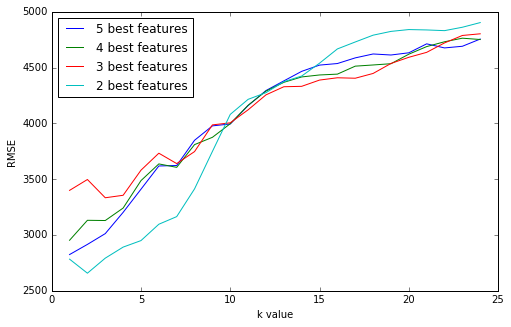

In [44]:
plt.figure(figsize=(8,5))

for k,v in k_rmse_results_new.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    plt.xlabel("k value")
    plt.ylabel("RMSE")
    plt.legend(loc="upper left")

It looks like when we have lower hyperparameters than 10, we will have better RMSE values. The RMSE values are the lowest when we use the two best features together.

K-Fold Cross Validation
---

Lastly, we will write a new function to implement KFold Cross Validation. The first one will have 5 folds. The other one will have many folds.

In [68]:
from sklearn.model_selection import cross_val_score, KFold

In [80]:
def knn_train_test_5_fold(train_col, target_col, df):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, df[[train_col]], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    return rmses

In [82]:
knn_train_test_5_fold("engine-size","price",normalized_cars)

array([3518.1003821 , 2938.85044243, 3003.56926423, 2967.43164774,
       3421.47923448])

We computed the function with the best feature "engine-size". Let's see the average and standard deviation of the 5 folds of RMSE values above.

In [86]:
rmses_5_fold = knn_train_test_5_fold("engine-size","price",normalized_cars)

In [95]:
ave_rmse_5_fold = np.mean(rmses_5_fold)
std_rmse_5_fold = np.std(rmses_5_fold)

print("Average RMSE for 5 folds:", ave_rmse_5_fold)
print("Standard Deviation for 5 folds:", std_rmse_5_fold)

Average RMSE for 5 folds: 3169.886194196555
Standard Deviation for 5 folds: 247.62021797381124


Let's modify the last function to have Kfold Cross Validation with many folds.

In [98]:
def knn_train_test_many_folds(train_col, target_col, df):
    num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
    for f in num_folds:
        kf = KFold(f, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[[train_col]], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        print(str(f), "folds: ", "avg RMSE:", str(avg_rmse), "std RMSE: ", str(std_rmse))

In [99]:
knn_train_test_many_folds("engine-size","price",normalized_cars)

3 folds:  avg RMSE: 3202.929577471487 std RMSE:  112.25090661964124
5 folds:  avg RMSE: 3169.886194196555 std RMSE:  247.62021797381124
7 folds:  avg RMSE: 3145.5790850045464 std RMSE:  317.7981622528513
9 folds:  avg RMSE: 3119.9016946768584 std RMSE:  424.62020109125393
10 folds:  avg RMSE: 3043.5029272033166 std RMSE:  504.7402574734498
11 folds:  avg RMSE: 3057.0695962969926 std RMSE:  646.264845394532
13 folds:  avg RMSE: 3074.1858046630737 std RMSE:  626.1949834253102
15 folds:  avg RMSE: 3119.8137681928542 std RMSE:  641.274503427889
17 folds:  avg RMSE: 2971.0870227934392 std RMSE:  835.4326015014728
19 folds:  avg RMSE: 2991.785101307862 std RMSE:  776.2665923668484
21 folds:  avg RMSE: 2930.5506169861824 std RMSE:  978.0990686946678
23 folds:  avg RMSE: 2982.3891484807164 std RMSE:  881.9866254013089


As we increase the number of folds, the average RMSE decreases. This sounds something like we want, however the standard deviation also increases up to very large points. Through lots of trial and error, data scientists have converged on 10 as the standard k value.

Multivariate K-Fold Cross Validation and Visualization
----

We have done the K-Fold Cross validation on one column "engine-size" which we found with the best RMSE value. Let's also do the same validation with the two best columns "engine-size" and "horsepower".

In [104]:
def knn_train_test_5_fold_upd(train_cols, target_col, df):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    return rmses

In [105]:
knn_train_test_5_fold_upd(["engine-size","horsepower"],"price",normalized_cars)

array([2878.44998567, 3058.94476086, 3228.55806561, 2922.20386027,
       2870.68556359])

In [112]:
rmses_5_fold_2ft = knn_train_test_5_fold(["engine-size","horsepower"],"price",normalized_cars)
ave_rmse_5_fold_2ft = np.mean(rmses_5_fold_2ft)
std_rmse_5_fold_2ft = np.std(rmses_5_fold_2ft)

print("Average RMSE for 5 folds with the 2 best features:", round(ave_rmse_5_fold_2ft,2))
print("Standard Deviation for 5 folds with the 2 best features:", round(std_rmse_5_fold_2ft,2))

Average RMSE for 5 folds with the 2 best features: 2991.77
Standard Deviation for 5 folds with the 2 best features: 136.33


In [113]:
def knn_train_test_many_folds_upd(train_cols, target_col, df):
    num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
    for f in num_folds:
        kf = KFold(f, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        print(str(f), "folds: ", "avg RMSE:", str(avg_rmse), "std RMSE: ", str(std_rmse))

In [114]:
knn_train_test_many_folds_upd(["engine-size","horsepower"],"price",normalized_cars)

3 folds:  avg RMSE: 3116.68063606799 std RMSE:  24.341574750158113
5 folds:  avg RMSE: 2991.768447200282 std RMSE:  136.3256033796088
7 folds:  avg RMSE: 3005.5092796506715 std RMSE:  438.22005195783464
9 folds:  avg RMSE: 2922.6088923669918 std RMSE:  721.4036010685254
10 folds:  avg RMSE: 2808.4983984193304 std RMSE:  658.295100073527
11 folds:  avg RMSE: 2967.54849723462 std RMSE:  849.8231877429064
13 folds:  avg RMSE: 2890.107715567666 std RMSE:  783.71823351537
15 folds:  avg RMSE: 2809.9606745469814 std RMSE:  833.7248985130357
17 folds:  avg RMSE: 2706.7158472940023 std RMSE:  1034.1065984524755
19 folds:  avg RMSE: 2771.7019641296515 std RMSE:  952.8413467358567
21 folds:  avg RMSE: 2718.9783272018 std RMSE:  1100.5597747483791
23 folds:  avg RMSE: 2657.8206696110065 std RMSE:  1101.8523038250353


In [128]:
#function to convert the above results into a list of lists
def knn_train_test_many_folds_upd_df(train_cols, target_col, df):
    num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
    many_folds = []
    for f in num_folds:
        kf = KFold(f, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        many_folds.append([f, avg_rmse, std_rmse])
    return many_folds

In [133]:
#convert that list of lists into a pandas dataframe
many_folds = pd.DataFrame(
    knn_train_test_many_folds_upd_df(
        ["engine-size","horsepower"],"price",normalized_cars),
    columns=["nb_of_folds","avg_rmse","std_rmse"])

Finally, let's visualize our findings with a multiline plot.

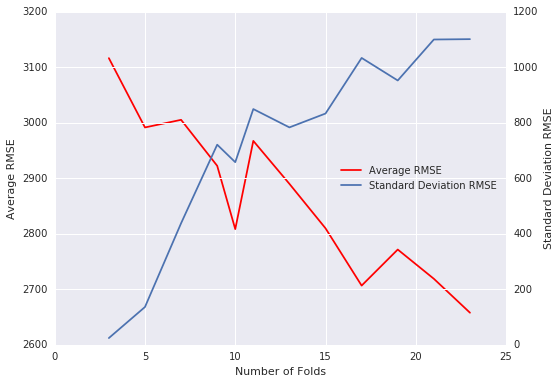

In [153]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Folds')
ax1.set_ylabel('Average RMSE')
lns1 = ax1.plot(many_folds["nb_of_folds"], many_folds["avg_rmse"], color="red", label="Average RMSE")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.set_ylabel('Standard Deviation RMSE')
lns2 = ax2.plot(many_folds["nb_of_folds"], many_folds["std_rmse"], label="Standard Deviation RMSE")
ax2.tick_params(axis='y')

fig.tight_layout()
lns = lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="center right")
plt.show()

As we mentioned before, when we increase the number of folds, the average RMSE decreases, however the standard deviation also increases. We want both of them to be the lowest as possible. Thus, we need to find an optimal point where the two best conditions met. Looking at the plot above, we can say that 10 folds would be optimal for our prediction model.

Conclusion
---

In this project we implemented some of the K-Nearest Neighbors algorithms to build machine learning models.

* Firstly, we performed some cleaning. We could not work these models without cleaning.
* Then we trained simple models and progressively added more complexity to them. We implemented the following steps:
    * Univariate and Multivariate Models
    * Used default number of neighbors and then increased the number of neighbors (k values)
    * Finally, performed a KFold Cross Validation
* We have found out the best features to use and the best number of k values to perfom prediction of a car's sales price. 
    * The two best features to use: Engine size, Horsepower
    * The best number of folds when we use default number of neighbors: 10 folds